In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import gdown
%matplotlib inline

pd. set_option('display.max_columns', None)


In [2]:
file_id = "1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o"
output_file = "train.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o
To: /content/train.csv
100%|██████████| 4.08M/4.08M [00:00<00:00, 41.6MB/s]


'train.csv'

In [3]:
# Load the dataset
fake_news_data = pd.read_csv('train.csv')
fake_news_data.head(10)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971,_5_,"[1, 0]",_NEG_
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,NEGATIVE,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604,_6_,"[0, 1]",_NEG_
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",NEGATIVE,-0.2,0.2,0.021023,0.077569,0.032182,0.038037,0.438594,_2_,"[0, 1]",_NEG_
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,NEGATIVE,-0.3,0.3,0.116767,0.099105,0.219329,0.051303,0.114302,_7_,"[0, 1]",_NEG_
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,NEGATIVE,-0.4,0.4,0.163977,0.101336,0.109979,0.330754,0.203412,_8_,"[1, 0]",_NEG_


In [4]:
# Check for missing values
missing_values = fake_news_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3239
state_info              2486
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  112
sentiment               1541
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1541
dtype: int64


In [5]:
# Fill missing values for 'speaker_job', 'state_info', 'context', and 'sentiment' with 'Unknown'
fake_news_data['speaker_job'].fillna('Unknown', inplace=True)
fake_news_data['state_info'].fillna('Unknown', inplace=True)
fake_news_data['context'].fillna('Unknown', inplace=True)
fake_news_data['sentiment'].fillna('Unknown', inplace=True)

# Fill missing values for 'sentiment_code' with the mode
mode_sentiment_code = fake_news_data['sentiment_code'].mode()[0]
fake_news_data['sentiment_code'].fillna(mode_sentiment_code, inplace=True)

# Verify if missing values are handled
missing_values_after = fake_news_data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 ID                      0
label                   0
statement               0
subject                 0
speaker                 0
speaker_job             0
state_info              0
party_affiliation       0
barely_true_counts      0
false_counts            0
half_true_counts        0
mostly_true_counts      0
pants_on_fire_counts    0
context                 0
sentiment               0
sentiment_score         0
sentiment_magnitude     0
anger                   0
fear                    0
joy                     0
disgust                 0
sad                     0
speaker_id              0
list                    0
sentiment_code          0
dtype: int64


In [6]:
# Check for duplicate rows
duplicates = fake_news_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Remove duplicate rows if any
fake_news_data.drop_duplicates(inplace=True)

# Confirm removal of duplicates
print("Number of duplicate rows after removal:", fake_news_data.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [7]:
# Display data types of each column
print("Data types:\n", fake_news_data.dtypes)

Data types:
 ID                       object
label                    object
statement                object
subject                  object
speaker                  object
speaker_job              object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
speaker_id               object
list                     object
sentiment_code           object
dtype: object


In [8]:
# Convert counts columns to integers
count_columns = ['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
fake_news_data[count_columns] = fake_news_data[count_columns].astype(int)

# Verify data types after conversion
print("Data types after conversion:\n", fake_news_data.dtypes)

Data types after conversion:
 ID                       object
label                    object
statement                object
subject                  object
speaker                  object
speaker_job              object
state_info               object
party_affiliation        object
barely_true_counts        int64
false_counts              int64
half_true_counts          int64
mostly_true_counts        int64
pants_on_fire_counts      int64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
speaker_id               object
list                     object
sentiment_code           object
dtype: object


In [9]:
#droping column iD
fake_news_data.drop(columns=['ID'], inplace=True)
fake_news_data.describe(include='all')

,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
count,11519,11519,11519,11519,11519,11519,11519,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519,11519,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519,11519,11519
unique,6,11497,4190,3125,1270,84,24,NaN,NaN,NaN,NaN,NaN,4763,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909,2,2
top,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,Unknown,Unknown,republican,NaN,NaN,NaN,NaN,NaN,a news release,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_2_,"[0, 1]",_NEG_
freq,2361,3,434,549,3239,2488,5092,NaN,NaN,NaN,NaN,NaN,276,8564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489,7461,10105
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.564893,13.349596,17.146975,16.455595,6.278062,NaN,NaN,-0.297543,0.429143,0.158227,0.135847,0.176459,0.202093,0.311713,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.980609,24.163892,35.824220,36.133691,16.301728,NaN,NaN,0.337396,0.329673,0.115627,0.107703,0.155817,0.160770,0.167579,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.600000,0.200000,0.071107,0.061308,0.059737,0.076107,0.180901,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN,NaN,-0.300000,0.400000,0.128860,0.106236,0.128039,0.158016,0.287732,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000,13.000000,11.000000,5.000000,NaN,NaN,0.000000,0.600000,0.215767,0.180576,0.249675,0.288714,0.418955,NaN,NaN,NaN


In [10]:
fake_news_data.dtypes

label                    object
statement                object
subject                  object
speaker                  object
speaker_job              object
state_info               object
party_affiliation        object
barely_true_counts        int64
false_counts              int64
half_true_counts          int64
mostly_true_counts        int64
pants_on_fire_counts      int64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
speaker_id               object
list                     object
sentiment_code           object
dtype: object

In [11]:
# Outliers
# Exclude non-numeric columns before calculating the IQR
numeric_columns = fake_news_data.select_dtypes(include=['int']).columns

# Calculate the IQR for numerical columns
Q1 = fake_news_data[numeric_columns].quantile(0.25)
Q3 = fake_news_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (fake_news_data[numeric_columns] < lower_bound) | (fake_news_data[numeric_columns] > upper_bound)

# Remove outliers
df_no_outliers = fake_news_data[~outliers.any(axis=1)]

# Display the shape of the dataset before and after removing outliers
print("Shape before removing outliers:", fake_news_data.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Shape before removing outliers: (11519, 24)
Shape after removing outliers: (8835, 24)


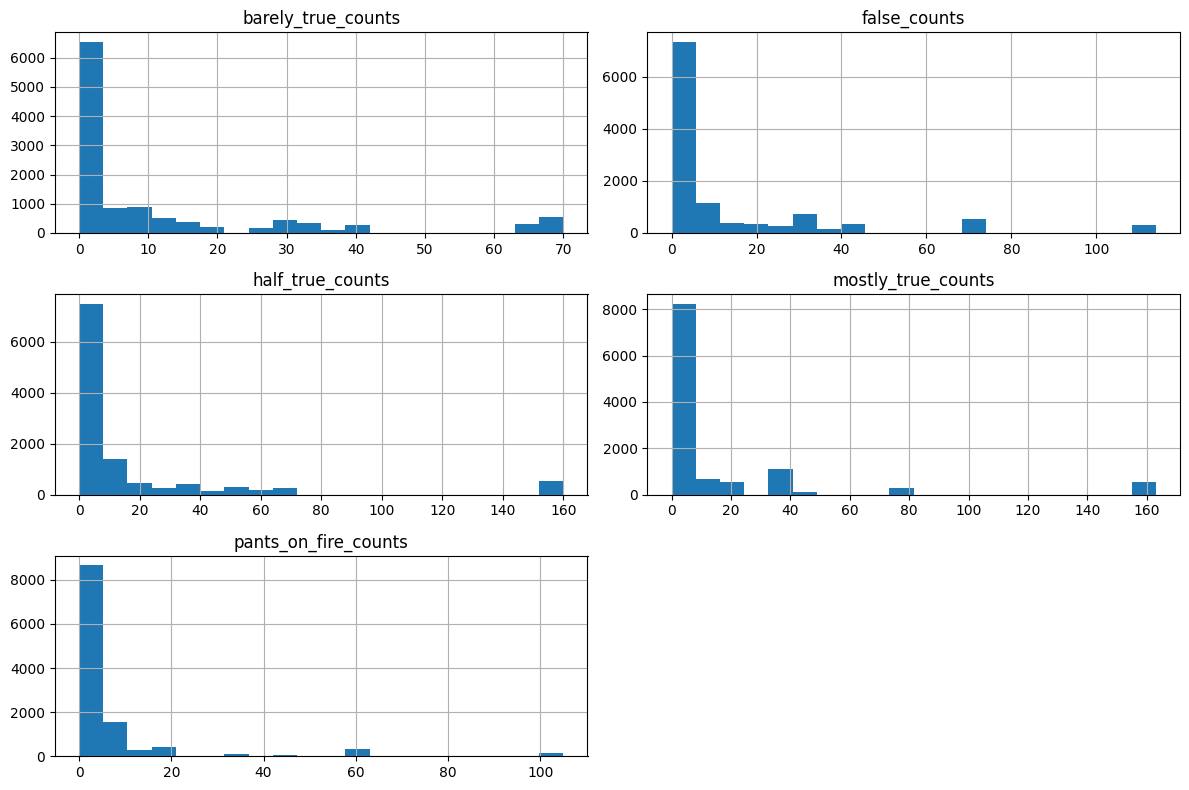

In [12]:
# Mapping Outliers
# Getting Outliers
import matplotlib.pyplot as plt

# Plot histograms for count columns
fake_news_data.hist(column=['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts'], bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

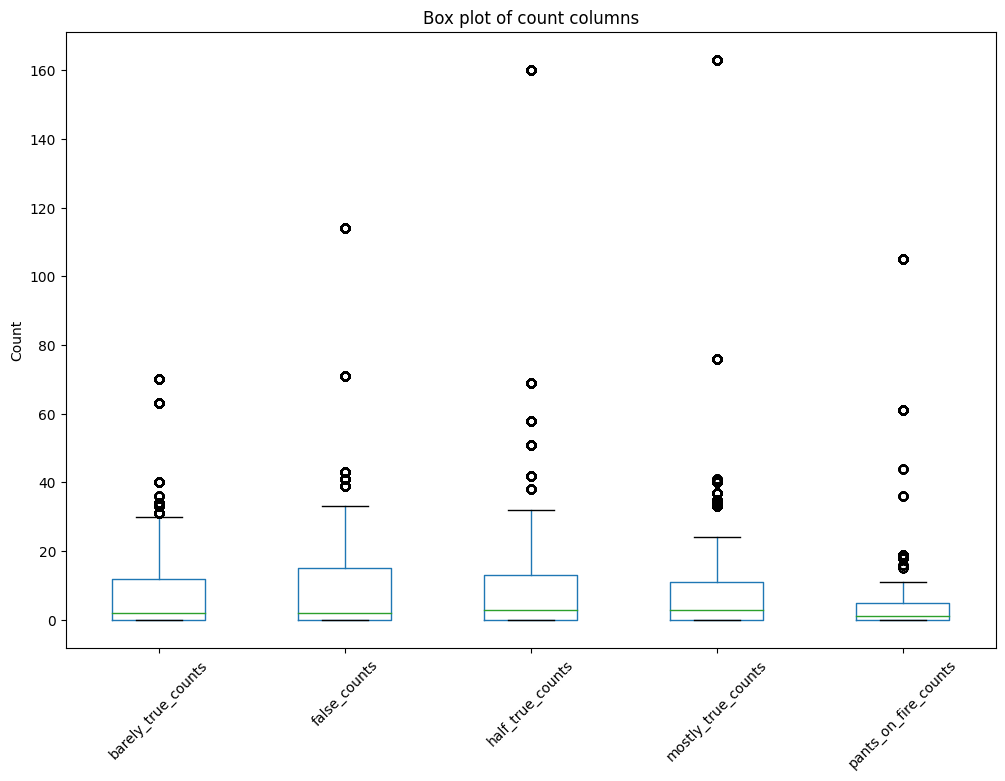

In [13]:
# Plotbox Outliers
# Plot box plots for count columns
plt.figure(figsize=(12, 8))
fake_news_data.boxplot(column=['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts'])
plt.title('Box plot of count columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [14]:
# Data Exploration
# Summary statistics for numerical columns
numerical_summary = fake_news_data.describe()
print("Summary statistics for numerical columns:\n", numerical_summary)


Summary statistics for numerical columns:
        barely_true_counts  false_counts  half_true_counts  mostly_true_counts  \
count        11519.000000  11519.000000      11519.000000        11519.000000   
mean            11.564893     13.349596         17.146975           16.455595   
std             18.980609     24.163892         35.824220           36.133691   
min              0.000000      0.000000          0.000000            0.000000   
25%              0.000000      0.000000          0.000000            0.000000   
50%              2.000000      2.000000          3.000000            3.000000   
75%             12.000000     15.000000         13.000000           11.000000   
max             70.000000    114.000000        160.000000          163.000000   

       pants_on_fire_counts  sentiment_score  sentiment_magnitude  \
count          11519.000000     11519.000000         11519.000000   
mean               6.278062        -0.297543             0.429143   
std               16

In [15]:
# Summary statistics for categorical columns
categorical_summary = fake_news_data.describe(include='object')
print("\nSummary statistics for categorical columns:\n", categorical_summary)


Summary statistics for categorical columns:
             label                                          statement  \
count       11519                                              11519   
unique          6                                              11497   
top     half-true  On changing the rules for filibusters on presi...   
freq         2361                                                  3   

            subject       speaker speaker_job state_info party_affiliation  \
count         11519         11519       11519      11519             11519   
unique         4190          3125        1270         84                24   
top     health-care  barack-obama     Unknown    Unknown        republican   
freq            434           549        3239       2488              5092   

               context sentiment speaker_id    list sentiment_code  
count            11519     11519      11519   11519          11519  
unique            4763         3       2909       2             

In [16]:
# Frequency distribution for categorical columns
categorical_columns = fake_news_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print("\nFrequency distribution for", column, ":")
    print(fake_news_data[column].value_counts())


Frequency distribution for label :
label
half-true      2361
false          2255
mostly-true    2213
barely-true    1891
true           1845
pants-fire      954
Name: count, dtype: int64

Frequency distribution for statement :
statement
On changing the rules for filibusters on presidential nominees                                                                                                                                                                                                                            3
On abortion                                                                                                                                                                                                                                                                               2
Americans havent had a raise in 15 years.                                                                                                                                                         

In [17]:
# Define target variable (label)
target = 'sentiment'

# Select features (excluding target variable)
features = fake_news_data.drop(columns=[target])

# Display the shape of the features DataFrame
print("Shape of features:", features.shape)

Shape of features: (11519, 23)


In [18]:
# Feature Selection
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
# Example: loading Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

In [20]:
# Initialize the model you want to use for feature selection
model = LogisticRegression()

# Initialize RFE
num_features_to_select = 1  # Example: selecting top 2 features
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = rfe.transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


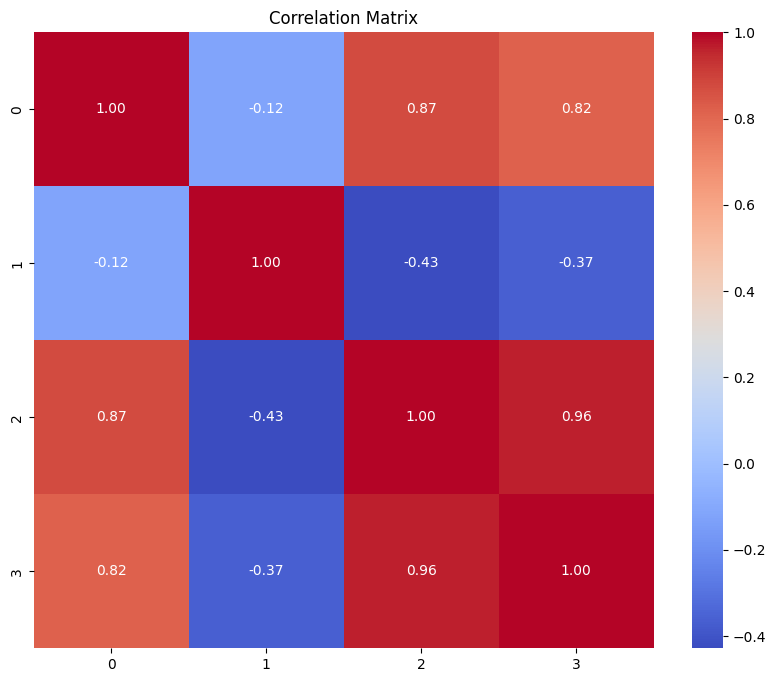

In [22]:
# Correlation Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data stored in matrix X

# Compute the correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Variance Inflation Factor (VIF): VIF measures the extent to which the variance of an estimated regression coefficient is increased due to collinearity.
# VIF values greater than 10 are often considered indicative of collinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.index = np.arange(1, len(vif) + 1)
vif.index.name = 'Feature'
vif['Feature'] = np.arange(1, len(vif) + 1)

print(vif)

                VIF  Feature
Feature                     
1        262.969348        1
2         96.353292        2
3        172.960962        3
4         55.502060        4


In [24]:
# Eigenvalues: Calculate the eigenvalues of the correlation matrix.
# If there are eigenvalues close to zero or very small relative to others, it indicates the presence of collinearity.
import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.91849782 0.91403047 0.14675688 0.02071484]


In [25]:
# Condition Number: Calculate the condition number of the correlation matrix.
# A condition number greater than 30 suggests the presence of collinearity.
cond_number = np.linalg.cond(corr_matrix)
print("Condition Number:", cond_number)

Condition Number: 140.8892523283358


In [26]:
# Selected_features for training your model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [27]:
# splitting data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, fake_news_data[target], test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9215, 23)
Shape of X_test: (2304, 23)
Shape of y_train: (9215,)
Shape of y_test: (2304,)


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder to the categorical features in the training data
encoder.fit(X_train.select_dtypes(include=['object']))

# Transform both training and testing categorical features
X_train_encoded = encoder.transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))

# Concatenate the encoded categorical features with the numerical features
import numpy as np
X_train_final = np.concatenate([X_train_encoded, X_train.select_dtypes(exclude=['object'])], axis=1)
X_test_final = np.concatenate([X_test_encoded, X_test.select_dtypes(exclude=['object'])], axis=1)

# Print the shapes of the final training and testing feature sets
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of X_train_final: (9215, 23165)
Shape of X_test_final: (2304, 23165)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the updated training data (with encoded categorical features)
rf_classifier.fit(X_train_final, y_train)

# Make predictions on the updated testing data
y_pred = rf_classifier.predict(X_test_final)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9986979166666666


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]    # Minimum number of samples required to split a node
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_final, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model's performance with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9978298611111112


In [31]:
# Random Forest Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute predictions
y_pred = rf_classifier.predict(X_test_final)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Model Evaluation and Fine-Tuning

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")

# Function to plot validation curves
def plot_validation_curves(model, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Validation Curve")

# Plot learning curves
plot_learning_curves(rf_classifier, X_train_selected, y_train_encoded)
plt.show()

# Plot validation curves for 'n_estimators' hyperparameter
param_range = [10, 50, 100, 150, 200]
plot_validation_curves(rf_classifier, X_train_selected, y_train_encoded, 'n_estimators', param_range)
plt.show()

In [ ]:
#Regularization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'max_features': ['auto', 'sqrt']  # Number of features to consider for the best split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train_encoded)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)

# Train the best estimator on the full training set
best_estimator.fit(X_train_selected, y_train_encoded)

# Evaluate the model on the test set
accuracy = best_estimator.score(X_test_selected, y_test_encoded)
print("Accuracy on test set:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = best_estimator.predict(X_test_selected)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

In [ ]:
# One-hot encode categorical columns
features_encoded = pd.get_dummies(features)

# Display the shape of the encoded features DataFrame
print("Shape of encoded features:", features_encoded.shape)

# Split the encoded features into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, df[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier with encoded features
rf_classifier_encoded = RandomForestClassifier(random_state=42)
rf_classifier_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions on the testing data with encoded features
y_pred_rf_encoded = rf_classifier_encoded.predict(X_test_encoded)

# Evaluate the performance of the classifier with encoded features
accuracy_rf_encoded = accuracy_score(y_test_encoded, y_pred_rf_encoded)
print("Accuracy of Random Forest Classifier with encoded features:", accuracy_rf_encoded)
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_rf_encoded))